### Importación de datos



In [23]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


tienda4.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,"1,084,800.00","56,000.00",11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.61,-74.08
1,Cama box,Muebles,"473,800.00","25,400.00",03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89,-72.51
2,Balón de baloncesto,Deportes y diversión,"23,700.00",0.00,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56
3,Modelado predictivo,Libros,"57,700.00","1,300.00",23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25,-75.56
4,Auriculares,Electrónicos,"138,900.00","5,600.00",25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.61,-74.08


#1. Análisis de facturación



In [ ]:
def procesar_tienda(df):
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], dayfirst=True, errors='coerce')
    df['Factura'] = df['Precio'] + df['Costo de envío']
    return df

# Aplicar procesamiento a cada tienda
tienda = procesar_tienda(tienda)
tienda2 = procesar_tienda(tienda2)
tienda3 = procesar_tienda(tienda3)
tienda4 = procesar_tienda(tienda4)

# Crear lista de resultados
resultados = []

for i, df in enumerate([tienda, tienda2, tienda3, tienda4], start=1):
    total_facturacion = df['Factura'].sum()
    num_ventas = df.shape[0]
    ticket_promedio = df['Factura'].mean()

    resultados.append({
        'Tienda': f'Tienda {i}',
        'Total Facturación': total_facturacion,
        'Número de Ventas': num_ventas,
        'Ticket Promedio': ticket_promedio
    })

# Crear DataFrame de comparación
df_resultados = pd.DataFrame(resultados).sort_values(by='Total Facturación')

# Mostrar resultados
print("🔎 Comparativo de Facturación entre Tiendas:\n")
print(df_resultados)

# Sugerencia de cierre
tienda_a_cerrar = df_resultados.iloc[0]['Tienda']
print(f"La tienda con menor facturación es **{tienda_a_cerrar}**, podría ser la candidata a cerrar.")


🔎 Comparativo de Facturación entre Tiendas:

     Tienda  Total Facturación  Número de Ventas  Ticket Promedio
3  Tienda 4       1.093693e+09              2358    463822.349449
2  Tienda 3       1.156536e+09              2359    490265.451462
1  Tienda 2       1.175829e+09              2359    498443.662569
0  Tienda 1       1.212258e+09              2359    513886.519712
La tienda con menor facturación es **Tienda 4**, podría ser la candidata a cerrar.


# 2. Ventas por categoría

In [ ]:
# Aplicar formato legible a todos los floats del programa
pd.options.display.float_format = '{:,.2f}'.format

# Función para procesar cada tienda
def procesar_tienda(df, tienda_nombre):
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], dayfirst=True, errors='coerce')
    df['Factura'] = df['Precio'] + df['Costo de envío']
    df['Tienda'] = tienda_nombre
    return df

# Procesar tiendas
tienda = procesar_tienda(tienda, 'Tienda 1')
tienda2 = procesar_tienda(tienda2, 'Tienda 2')
tienda3 = procesar_tienda(tienda3, 'Tienda 3')
tienda4 = procesar_tienda(tienda4, 'Tienda 4')

# Unir todos los datos
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Agrupar por categoría
resumen_categoria = df_total.groupby('Categoría del Producto').agg({
    'Factura': ['sum', 'mean', 'count']
}).reset_index()

# Renombrar columnas
resumen_categoria.columns = ['Categoría', 'Facturación Total', 'Ticket Promedio', 'Número de Ventas']

# Ordenar de mayor a menor facturación
resumen_categoria = resumen_categoria.sort_values(by='Facturación Total', ascending=False)

# Mostrar resumen
print("🛒 Análisis de Ventas por Categoría:\n")
print(resumen_categoria)

🛒 Análisis de Ventas por Categoría:

                 Categoría  Facturación Total  Ticket Promedio  \
3             Electrónicos   1,749,038,600.00       987,042.10   
2        Electrodomésticos   1,395,147,400.00     1,214,227.50   
7                  Muebles     798,111,400.00       423,176.78   
4   Instrumentos musicales     367,276,900.00       487,751.53   
1     Deportes y diversión     150,669,300.00       135,372.24   
5                 Juguetes      77,625,700.00        60,174.96   
0  Artículos para el hogar      60,690,900.00        83,138.22   
6                   Libros      39,756,000.00        53,579.51   

   Número de Ventas  
3              1772  
2              1149  
7              1886  
4               753  
1              1113  
5              1290  
0               730  
6               742  


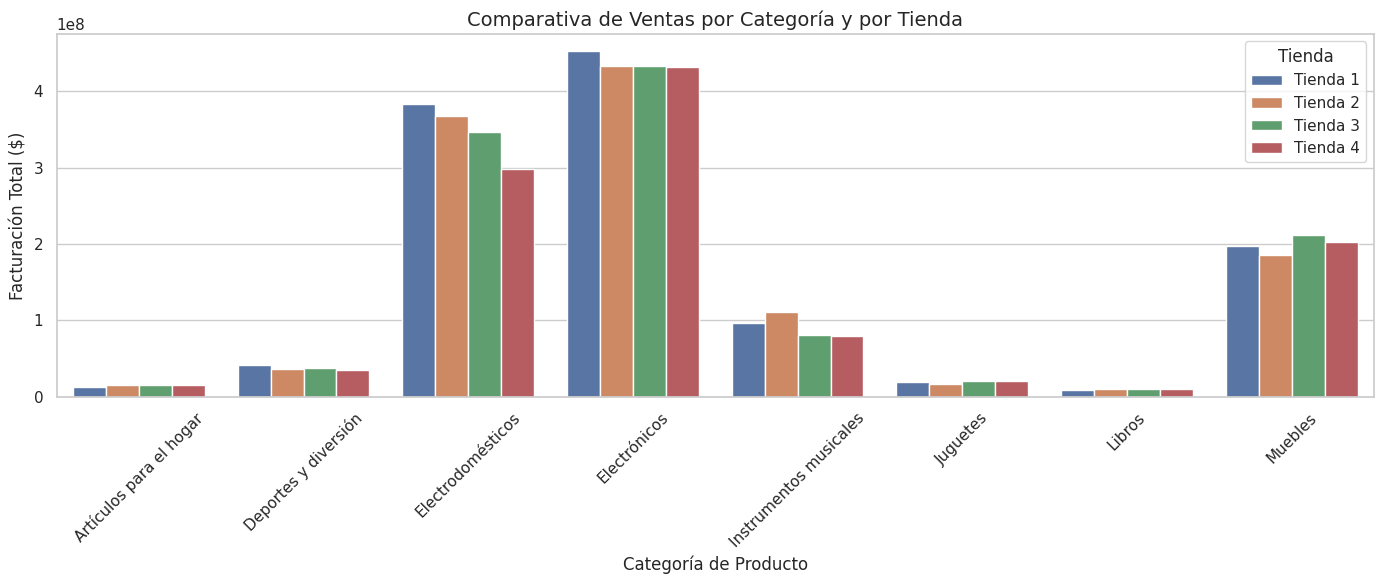

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Opcional: cambiar estilo de gráfico
sns.set(style='whitegrid')

# Asegurar formato de números
pd.options.display.float_format = '{:,.2f}'.format

# (Reutiliza la función procesar_tienda si no lo hiciste antes)
def procesar_tienda(df, tienda_nombre):
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], dayfirst=True, errors='coerce')
    df['Factura'] = df['Precio'] + df['Costo de envío']
    df['Tienda'] = tienda_nombre
    return df

# Procesar y unir datos
tienda = procesar_tienda(tienda, 'Tienda 1')
tienda2 = procesar_tienda(tienda2, 'Tienda 2')
tienda3 = procesar_tienda(tienda3, 'Tienda 3')
tienda4 = procesar_tienda(tienda4, 'Tienda 4')

df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Agrupar por tienda y categoría
ventas_por_categoria = df_total.groupby(['Tienda', 'Categoría del Producto'])['Factura'].sum().reset_index()

# Renombrar para facilidad
ventas_por_categoria.columns = ['Tienda', 'Categoría', 'Facturación']

# Crear gráfico de barras agrupadas
plt.figure(figsize=(14, 6))
sns.barplot(data=ventas_por_categoria, x='Categoría', y='Facturación', hue='Tienda')

plt.title('Comparativa de Ventas por Categoría y por Tienda', fontsize=14)
plt.xlabel('Categoría de Producto')
plt.ylabel('Facturación Total ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Tienda')
plt.show()


# 3. Calificación promedio de la tienda


/tmp/ipython-input-154542821.py:35: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


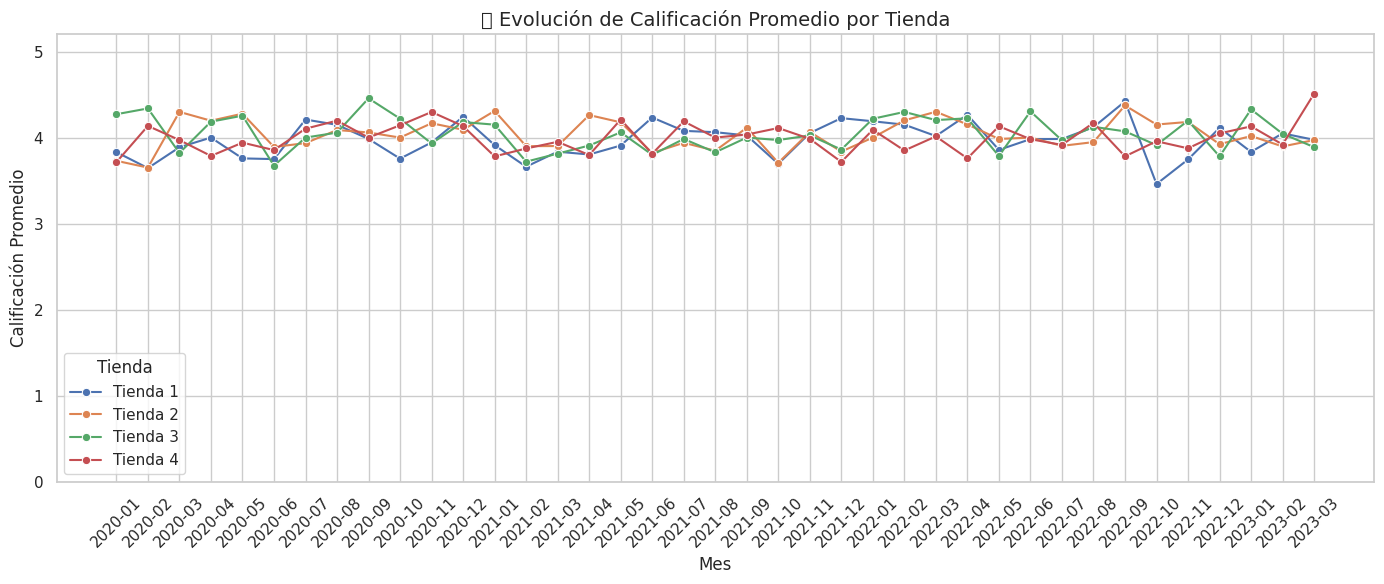

In [ ]:
# Configuraciones visuales
sns.set(style="whitegrid")
pd.options.display.float_format = '{:,.2f}'.format

# Procesar tiendas (si no lo hiciste antes)
def procesar_tienda(df, tienda_nombre):
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], dayfirst=True, errors='coerce')
    df['Factura'] = df['Precio'] + df['Costo de envío']
    df['Tienda'] = tienda_nombre
    return df

# Procesar y unir datos
tienda = procesar_tienda(tienda, 'Tienda 1')
tienda2 = procesar_tienda(tienda2, 'Tienda 2')
tienda3 = procesar_tienda(tienda3, 'Tienda 3')
tienda4 = procesar_tienda(tienda4, 'Tienda 4')

df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Crear columna Año-Mes
df_total['Mes'] = df_total['Fecha de Compra'].dt.to_period('M').astype(str)

# Calcular promedio de calificaciones por mes y tienda
calificaciones = df_total.groupby(['Tienda', 'Mes'])['Calificación'].mean().reset_index()

# Gráfico de líneas
plt.figure(figsize=(14, 6))
sns.lineplot(data=calificaciones, x='Mes', y='Calificación', hue='Tienda', marker='o')

plt.title('📈 Evolución de Calificación Promedio por Tienda', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=45)
plt.ylim(0, 5.2)
plt.tight_layout()
plt.legend(title='Tienda')
plt.show()

# 4. Productos más y menos vendidos


📊 Tienda 1
🔝 Top 10 productos más vendidos:
Producto
Microondas                 60
TV LED UHD 4K              60
Armario                    60
Secadora de ropa           58
Mesa de noche              56
Bloques de construcción    56
Balón de baloncesto        55
Bicicleta                  54
Vaso térmico               54
Refrigerador               54
Name: count, dtype: int64

🔻 Top 10 productos menos vendidos:
Producto
Auriculares con micrófono      33
Celular ABXY                   33
Olla de presión                35
Pandereta                      36
Mochila                        39
Ciencia de datos con Python    39
Cuerda para saltar             40
Asistente virtual              40
Muñeca bebé                    40
Dinosaurio Rex                 40
Name: count, dtype: int64


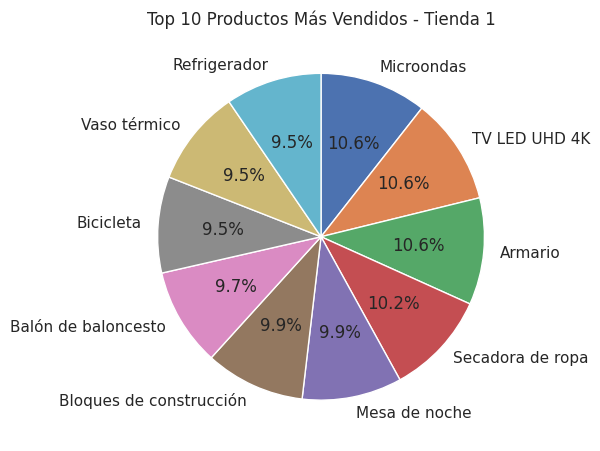

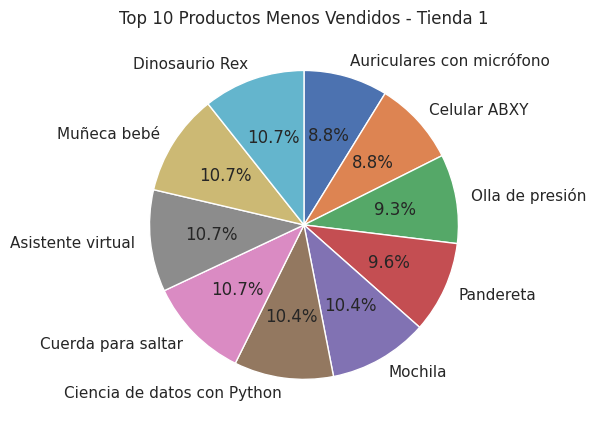


📊 Tienda 2
🔝 Top 10 productos más vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Secadora de ropa             57
Iphone 15                    55
Bloques de construcción      54
Armario                      54
Set de ollas                 52
Name: count, dtype: int64

🔻 Top 10 productos menos vendidos:
Producto
Juego de mesa        32
Mesa de comedor      34
Impresora            34
Sillón               35
Auriculares          37
Asistente virtual    38
Cubertería           39
Smart TV             40
Celular ABXY         41
Estufa               42
Name: count, dtype: int64


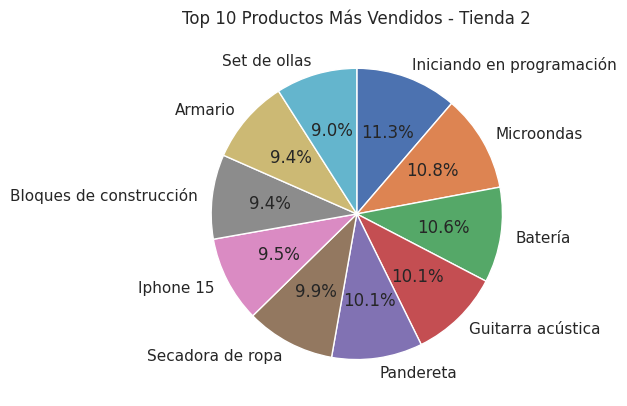

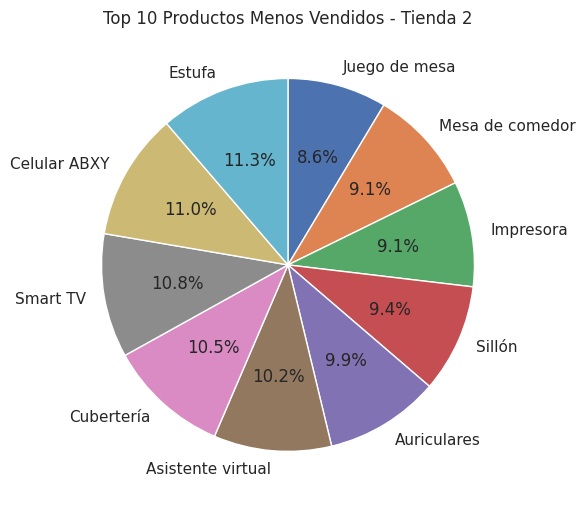


📊 Tienda 3
🔝 Top 10 productos más vendidos:
Producto
Kit de bancas                57
Mesa de comedor              56
Cama king                    56
Set de ollas                 55
Mesa de noche                55
Smart TV                     54
Estufa                       53
Cuerda para saltar           53
Modelado predictivo          53
Carrito de control remoto    52
Name: count, dtype: int64

🔻 Top 10 productos menos vendidos:
Producto
Bloques de construcción      35
Microondas                   36
Set de vasos                 36
Mochila                      36
Vaso térmico                 38
Guitarra eléctrica           38
Cubertería                   39
Auriculares con micrófono    39
Asistente virtual            39
Muñeca bebé                  39
Name: count, dtype: int64


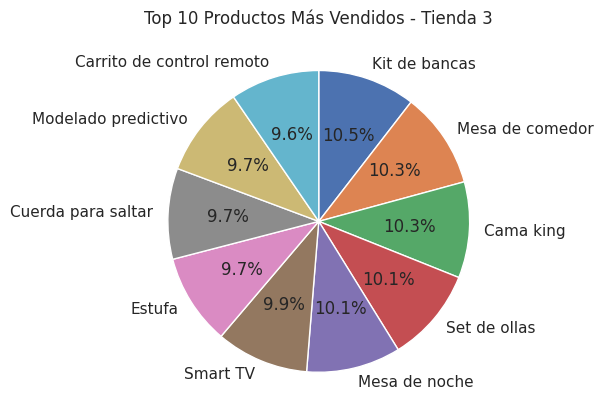

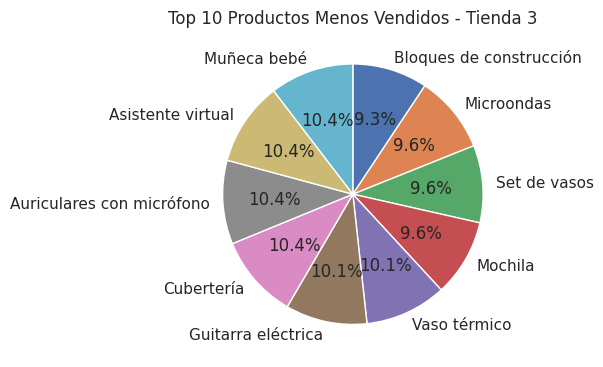


📊 Tienda 4
🔝 Top 10 productos más vendidos:
Producto
Cama box                     62
Cubertería                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55
Mesa de comedor              55
Mesa de noche                55
Smart TV                     54
Bloques de construcción      54
Pandereta                    52
Name: count, dtype: int64

🔻 Top 10 productos menos vendidos:
Producto
Guitarra eléctrica             33
Armario                        34
Guitarra acústica              37
Ciencia de datos con Python    38
Lavadora de ropa               38
Refrigerador                   38
Ajedrez de madera              39
Smartwatch                     39
Celular ABXY                   39
Secadora de ropa               40
Name: count, dtype: int64


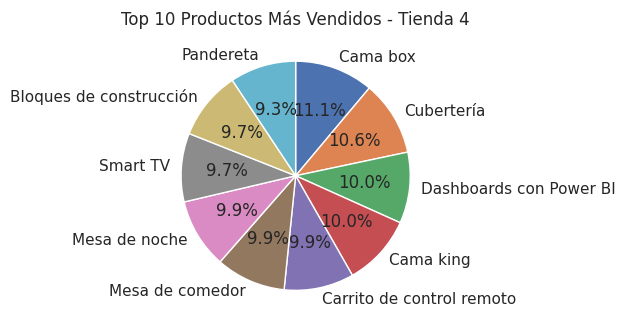

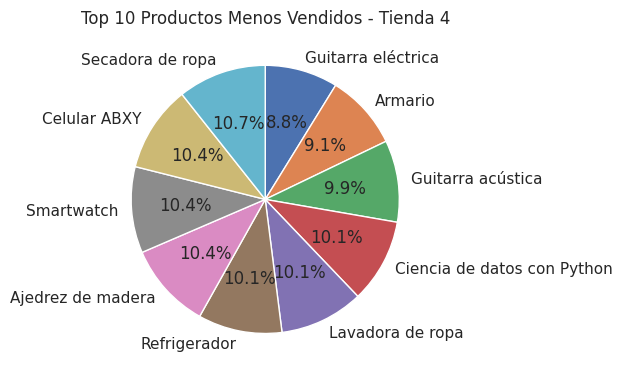


📊 Todas las Tiendas
🔝 Top 10 productos más vendidos:
Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Secadora de ropa             200
Modelado predictivo          200
Set de ollas                 200
Cama box                     199
Bloques de construcción      199
Name: count, dtype: int64

🔻 Top 10 productos menos vendidos:
Producto
Celular ABXY                   157
Auriculares con micrófono      158
Mochila                        163
Guitarra eléctrica             165
Ciencia de datos con Python    166
Asistente virtual              167
Sillón                         168
Set de vasos                   169
Olla de presión                172
Smartwatch                     172
Name: count, dtype: int64


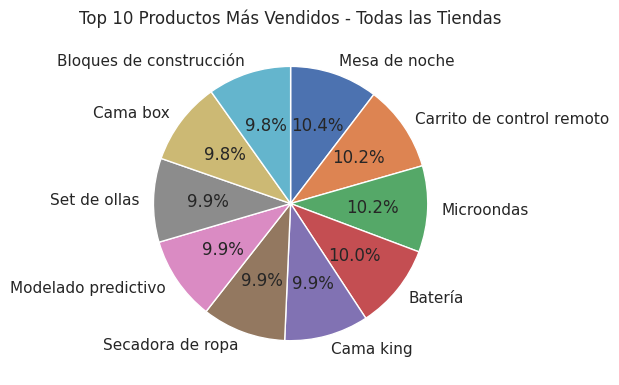

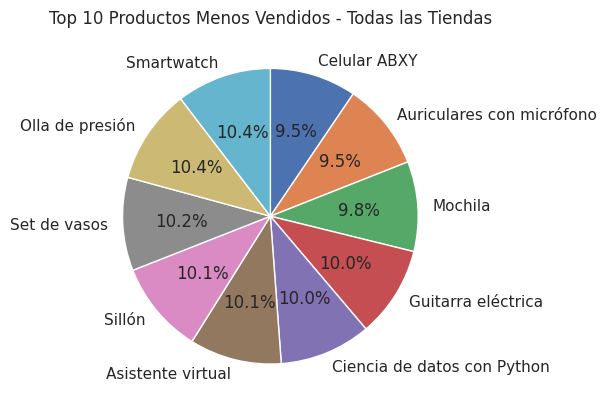

In [ ]:
# Asegurar buen estilo visual
plt.rcParams.update({'figure.max_open_warning': 0})

# Procesar tienda
def procesar_tienda(df, tienda_nombre):
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], dayfirst=True, errors='coerce')
    df['Factura'] = df['Precio'] + df['Costo de envío']
    df['Tienda'] = tienda_nombre
    return df

# Procesar y unir datos
tienda = procesar_tienda(tienda, 'Tienda 1')
tienda2 = procesar_tienda(tienda2, 'Tienda 2')
tienda3 = procesar_tienda(tienda3, 'Tienda 3')
tienda4 = procesar_tienda(tienda4, 'Tienda 4')

df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Función para graficar los top 10 más y menos vendidos
def graficar_top10(df, nombre_tienda):
    ventas_producto = df['Producto'].value_counts()

    # Top 10 más vendidos
    top10_mas = ventas_producto.head(10)

    # Top 10 menos vendidos (pero solo productos con al menos 1 venta)
    top10_menos = ventas_producto[ventas_producto > 0].sort_values().head(10)

    # Mostrar nombres de los extremos
    print(f"\n📊 {nombre_tienda}")
    print("🔝 Top 10 productos más vendidos:")
    print(top10_mas)

    print("\n🔻 Top 10 productos menos vendidos:")
    print(top10_menos)

    # Gráfico de torta: más vendidos
    plt.figure(figsize=(6, 6))
    top10_mas.plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False)
    plt.title(f'Top 10 Productos Más Vendidos - {nombre_tienda}')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

    # Gráfico de torta: menos vendidos
    plt.figure(figsize=(6, 6))
    top10_menos.plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False)
    plt.title(f'Top 10 Productos Menos Vendidos - {nombre_tienda}')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

# Ejecutar para cada tienda
graficar_top10(tienda, 'Tienda 1')
graficar_top10(tienda2, 'Tienda 2')
graficar_top10(tienda3, 'Tienda 3')
graficar_top10(tienda4, 'Tienda 4')

# Ejecutar para todas las tiendas unidas
graficar_top10(df_total, 'Todas las Tiendas')

In [ ]:
# Contar cuántas veces se vendió cada producto
ventas_por_producto = df['Producto'].value_counts()

# Obtener el producto más vendido
producto_mas_vendido = ventas_por_producto.idxmax()
cantidad_mas_vendido = ventas_por_producto.max()

# Obtener el producto menos vendido
producto_menos_vendido = ventas_por_producto.idxmin()
cantidad_menos_vendido = ventas_por_producto.min()

print(f"Producto más vendido: {producto_mas_vendido} ({cantidad_mas_vendido} ventas)")
print(f"Producto menos vendido: {producto_menos_vendido} ({cantidad_menos_vendido} ventas)")

Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 ventas)


# 5. Envío promedio por tienda

In [24]:
def limpiar_y_promediar(df, nombre_tienda):
    if "Costo de envío" not in df.columns:
        print(f"Columna 'Costo de envío' no encontrada en {nombre_tienda}")
        return None

    # Convertir a numérico y manejar errores
    df["Costo de envío"] = pd.to_numeric(df["Costo de envío"], errors="coerce")

    # Calcular el promedio, ignorando valores nulos
    promedio = df["Costo de envío"].mean()
    print(f"Promedio de costo de envío en {nombre_tienda}: ${promedio:.2f}")
    return promedio

# Calcular promedios por tienda
promedio1 = limpiar_y_promediar(tienda, "Tienda 1")
promedio2 = limpiar_y_promediar(tienda2, "Tienda 2")
promedio3 = limpiar_y_promediar(tienda3, "Tienda 3")
promedio4 = limpiar_y_promediar(tienda4, "Tienda 4")


Promedio de costo de envío en Tienda 1: $26018.61
Promedio de costo de envío en Tienda 2: $25216.24
Promedio de costo de envío en Tienda 3: $24805.68
Promedio de costo de envío en Tienda 4: $23459.46


# 5. Comparativos por tiendas

In [26]:
def resumen_tienda(df, nombre):
    return {
        "Tienda": nombre,
        "Ventas totales": df["Precio"].sum(),
        "Costo de envío promedio": df["Costo de envío"].mean(),
        "Calificación promedio": df["Calificación"].mean(),
        "Total productos vendidos": df["Producto"].nunique()
    }

resumen = [
    resumen_tienda(tienda, "Tienda 1"),
    resumen_tienda(tienda2, "Tienda 2"),
    resumen_tienda(tienda3, "Tienda 3"),
    resumen_tienda(tienda4, "Tienda 4")
]

df_resumen = pd.DataFrame(resumen)
display(df_resumen)

,Tienda,Ventas totales,Costo de envío promedio,Calificación promedio,Total productos vendidos
0,Tienda 1,"1,150,880,400.00","26,018.61",3.98,51
1,Tienda 2,"1,116,343,500.00","25,216.24",4.04,51
2,Tienda 3,"1,098,019,600.00","24,805.68",4.05,51
3,Tienda 4,"1,038,375,700.00","23,459.46",4.00,51


In [27]:
# Evaluamos cuál tiene las ventas más bajas y calificación promedio más baja
tienda_a_cerrar = df_resumen.sort_values(by=["Ventas totales", "Calificación promedio"]).iloc[0]
print("Se recomienda cerrar:", tienda_a_cerrar["Tienda"])

Se recomienda cerrar: Tienda 4


🏁 Conclusión

Aunque Tienda 1 tiene el peor costo de envío y la peor calificación, tiene las ventas más altas, lo cual es un factor muy relevante.

En cambio, Tienda 4:

Tiene las ventas más bajas.

Tiene una calificación intermedia.

Aunque el costo de envío es el mejor, no compensa las bajas ventas.